In [76]:
import pandas as pd

# Cargo los archivos como dataframes
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')

# Almacenamos los índices de las filas con valores NaN
nan1t = df1.index[df1['T_agua'].isnull()]
nan1a = df1.index[df1['T_aire'].isnull()]
nan2 = df2.index[df2.isnull().any(axis=1)]

print("Indices con NaN en T_agua:", nan1t)
print("Indices con NaN en T_aire:", nan1a)
print("Indices con NaN en df2:", nan2)


Indices con NaN en T_agua: Index([   803,    804,    805,    806,    807,    808,    809,    810,    811,
          812,
       ...
       171817, 171818, 171819, 171820, 171821, 171822, 171823, 171824, 171825,
       171826],
      dtype='int64', length=7588)
Indices con NaN en T_aire: Index([   803,    804,    805,    806,    807,    808,    809,    810,    811,
          812,
       ...
       171817, 171818, 171819, 171820, 171821, 171822, 171823, 171824, 171825,
       171826],
      dtype='int64', length=2719)
Indices con NaN en df2: Index([  3743,  12804,  12805,  12806,  12807,  12808,  27460,  27461,  28501,
        28502,
       ...
       146859, 146860, 146861, 146862, 146863, 146864, 146865, 146866, 146867,
       146868],
      dtype='int64', length=2702)


In [77]:
#Interpolo los huecos y los guardo como archivos por separado
df1=df1.interpolate()
df2=df2.interpolate()
df1.to_csv('dint1.csv', index=False)
df2.to_csv('dint2.csv', index=False)

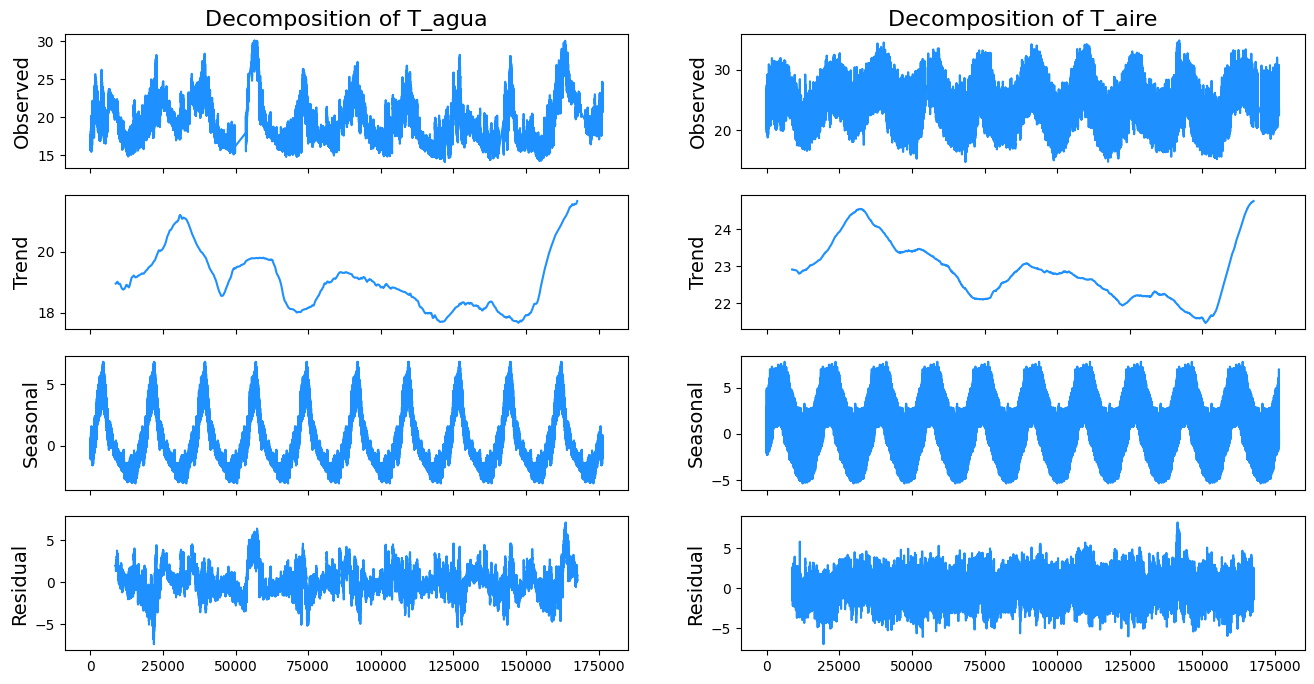

In [78]:
#cargo la data interpolada y la no interpolada
df1=pd.read_csv('df1.csv')
df2=pd.read_csv('df2.csv')
dfi1=pd.read_csv('dint1.csv')
dfi2=pd.read_csv('dint2.csv')
#realizo el analisis de seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

core_columns1 =  ['T_agua', 'T_aire']
for column in core_columns1:
    decomp = seasonal_decompose(dfi1[column], period=17520, model='additive')
    df1[f"{column}_trend"] = decomp.trend
    df1[f"{column}_seasonal"] = decomp.seasonal
    df1[f"{column}_resid"] = decomp.resid
    
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['T_agua', 'T_aire']):
    
    res = seasonal_decompose(dfi1[column], period=17520, model='additive')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [79]:
df1.head()

,Date,T_agua,T_aire,T_agua_trend,T_agua_seasonal,T_agua_resid,T_aire_trend,T_aire_seasonal,T_aire_resid
0,2013-12-10 16:00:00,17.106,26.842,NaN,0.185537,NaN,NaN,2.993322,NaN
1,2013-12-10 16:30:00,17.082,26.867,NaN,0.140354,NaN,NaN,2.616322,NaN
2,2013-12-10 17:00:00,16.749,26.280,NaN,-0.028163,NaN,NaN,2.544545,NaN
3,2013-12-10 17:30:00,16.654,25.695,NaN,-0.205124,NaN,NaN,2.079101,NaN
4,2013-12-10 18:00:00,16.511,25.113,NaN,-0.315084,NaN,NaN,1.385657,NaN


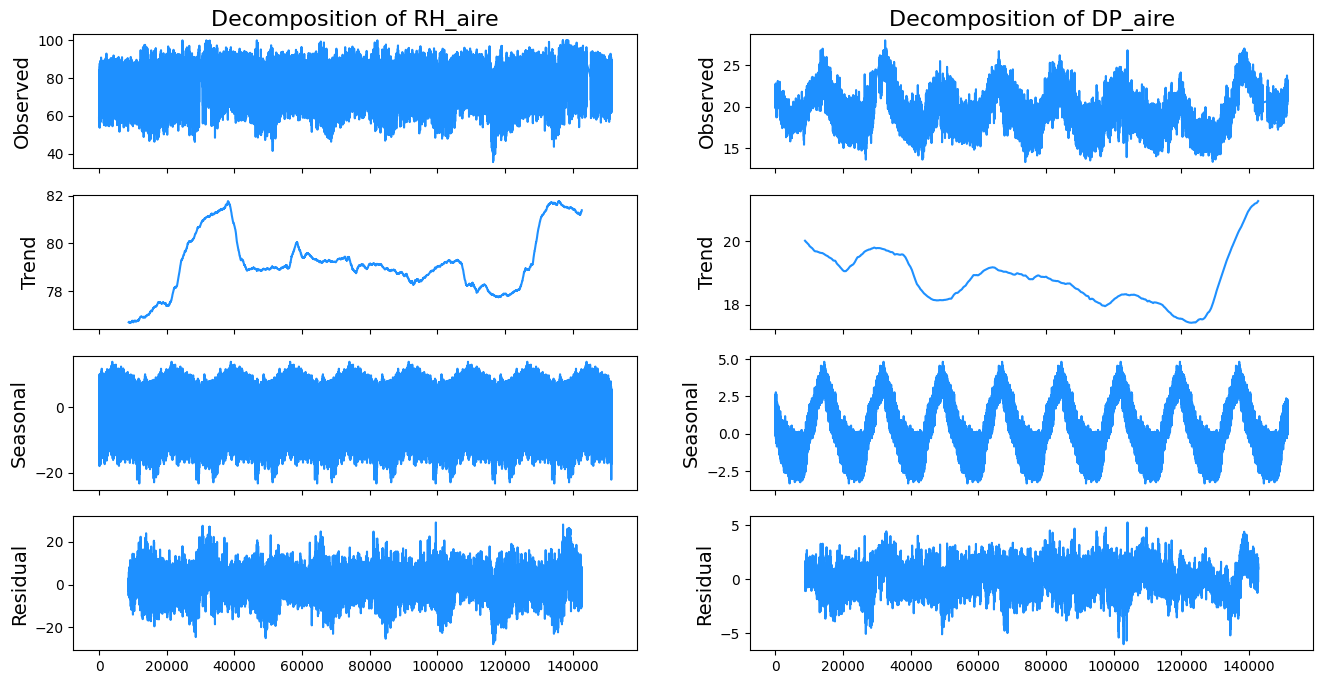

In [80]:
core_columns2 =  ['RH_aire', 'DP_aire']

for column in core_columns2:
    decomp = seasonal_decompose(dfi2[column], period=17520, model='additive')
    df2[f"{column}_trend"] = decomp.trend
    df2[f"{column}_seasonal"] = decomp.seasonal
    df2[f"{column}_resid"] = decomp.resid

fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['RH_aire', 'DP_aire']):
    
    res = seasonal_decompose(dfi2[column], period=17520, model='additive')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [81]:
df2.head()

,Date,RH_aire,DP_aire,RH_aire_trend,RH_aire_seasonal,RH_aire_resid,DP_aire_trend,DP_aire_seasonal,DP_aire_resid
0,2015-05-14 15:00:00,58.9,21.2,NaN,-12.624246,NaN,NaN,1.431582,NaN
1,2015-05-14 15:30:00,59.0,21.3,NaN,-11.674256,NaN,NaN,1.584081,NaN
2,2015-05-14 16:00:00,58.2,21.5,NaN,-11.611780,NaN,NaN,1.555328,NaN
3,2015-05-14 16:30:00,58.5,21.2,NaN,-11.061807,NaN,NaN,1.319074,NaN
4,2015-05-14 17:00:00,57.0,21.3,NaN,-9.574330,NaN,NaN,1.135321,NaN


In [82]:
# Reemplazar valores nulos en RH_aire con la suma de RH_seasonal y RH_trend
df2['RH_aire'] = df2.apply(lambda row: row['RH_aire_seasonal'] + row['RH_aire_trend'] if pd.isnull(row['RH_aire']) else row['RH_aire'], axis=1)

# Reemplazar valores nulos en DP_aire con la suma de DP_seasonal y DP_trend
df2['DP_aire'] = df2.apply(lambda row: row['DP_aire_seasonal'] + row['DP_aire_trend'] if pd.isnull(row['DP_aire']) else row['DP_aire'], axis=1)

# Iterar sobre las filas de df2 para imprimir información cuando se reemplace un NaN
for index, row in df2.iterrows():
    if pd.isnull(row['RH_aire']):
        print(f"Fila: {index}, Valor de trend_RH: {row['RH_aire_trend']}, Valor de seasonal_RH: {row['RH_aire_seasonal']}")

for index, row in df2.iterrows():
    if pd.isnull(row['DP_aire']):
        print(f"Fila: {index}, Valor de trend_DP: {row['DP_aire_trend']}, Valor de seasonal_DP: {row['DP_aire_seasonal']}")

# Reemplazar valores nulos en RH_aire con la suma de RH_seasonal y RH_trend
df1['T_agua'] = df1.apply(lambda row: row['T_agua_seasonal'] + row['T_agua_trend'] if pd.isnull(row['T_agua']) else row['T_agua'], axis=1)

# Reemplazar valores nulos en DP_aire con la suma de DP_seasonal y DP_trend
df1['T_aire'] = df1.apply(lambda row: row['T_aire_seasonal'] + row['T_aire_trend'] if pd.isnull(row['T_aire']) else row['T_aire'], axis=1)

# Iterar sobre las filas de df1 para imprimir información cuando se reemplace un NaN
for index, row in df1.iterrows():
    if pd.isnull(row['T_agua']):
        print(f"Fila: {index}, Valor de trend_Tw: {row['T_agua_trend']}, Valor de seasonal_Tw: {row['T_agua_seasonal']}")

for index, row in df1.iterrows():
    if pd.isnull(row['T_aire']):
        print(f"Fila: {index}, Valor de trend_Ta: {row['T_aire_trend']}, Valor de seasonal_Ta: {row['T_aire_seasonal']}")


Fila: 3743, Valor de trend_RH: nan, Valor de seasonal_RH: -13.601431464451132
Fila: 144040, Valor de trend_RH: nan, Valor de seasonal_RH: 1.934718242006781
Fila: 144041, Valor de trend_RH: nan, Valor de seasonal_RH: 1.263279885842406
Fila: 144042, Valor de trend_RH: nan, Valor de seasonal_RH: -0.02244214612106747
Fila: 144043, Valor de trend_RH: nan, Valor de seasonal_RH: -3.379586634053232
Fila: 144044, Valor de trend_RH: nan, Valor de seasonal_RH: -5.5367303065907345
Fila: 144045, Valor de trend_RH: nan, Valor de seasonal_RH: -7.536744168299805
Fila: 144046, Valor de trend_RH: nan, Valor de seasonal_RH: -9.951060052187607
Fila: 144047, Valor de trend_RH: nan, Valor de seasonal_RH: -9.408246940641607
Fila: 144048, Valor de trend_RH: nan, Valor de seasonal_RH: -10.079724435749249
Fila: 144049, Valor de trend_RH: nan, Valor de seasonal_RH: -11.13691173190059
Fila: 144050, Valor de trend_RH: nan, Valor de seasonal_RH: -10.279811275279574
Fila: 144051, Valor de trend_RH: nan, Valor de sea

Fila: 3743, Valor de trend_DP: nan, Valor de seasonal_DP: -0.8684417298787573
Fila: 144040, Valor de trend_DP: nan, Valor de seasonal_DP: -0.8865402295525983
Fila: 144041, Valor de trend_DP: nan, Valor de seasonal_DP: -0.543674117354295
Fila: 144042, Valor de trend_DP: nan, Valor de seasonal_DP: 0.09062060704231319
Fila: 144043, Valor de trend_DP: nan, Valor de seasonal_DP: -0.10222760724340303
Fila: 144044, Valor de trend_DP: nan, Valor de seasonal_DP: 0.014921895365862171
Fila: 144045, Valor de trend_DP: nan, Valor de seasonal_DP: -0.03364517084418428
Fila: 144046, Valor de trend_DP: nan, Valor de seasonal_DP: 0.012073232613090214
Fila: 144047, Valor de trend_DP: nan, Valor de seasonal_DP: -0.18792317965044483
Fila: 144048, Valor de trend_DP: nan, Valor de seasonal_DP: 0.18779424533324746
Fila: 144049, Valor de trend_DP: nan, Valor de seasonal_DP: -0.18363000450367684
Fila: 144050, Valor de trend_DP: nan, Valor de seasonal_DP: -0.5593396832381828
Fila: 144051, Valor de trend_DP: nan,

Fila: 803, Valor de trend_Tw: nan, Valor de seasonal_Tw: -0.3823862239018392
Fila: 804, Valor de trend_Tw: nan, Valor de seasonal_Tw: -0.30498518651660095
Fila: 805, Valor de trend_Tw: nan, Valor de seasonal_Tw: -0.12769517462604082
Fila: 806, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.020928192794711992
Fila: 807, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.20699600465990486
Fila: 808, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.3747304705078527
Fila: 809, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.520687285417186
Fila: 810, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.6610886842940471
Fila: 811, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.7533789720598054
Fila: 812, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.8041137993993799
Fila: 813, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.7221820552016618
Fila: 814, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.548250383936465
Fila: 815, Valor de trend_Tw: nan, Valor de seasonal_Tw: 0.46865218235670864
Fila:

Fila: 803, Valor de trend_Ta: nan, Valor de seasonal_Ta: 1.238465926240533
Fila: 804, Valor de trend_Ta: nan, Valor de seasonal_Ta: 1.2736758926281515
Fila: 805, Valor de trend_Ta: nan, Valor de seasonal_Ta: 1.0753303954186135
Fila: 806, Valor de trend_Ta: nan, Valor de seasonal_Ta: 2.023095996636271
Fila: 807, Valor de trend_Ta: nan, Valor de seasonal_Ta: 2.483641528726579
Fila: 808, Valor de trend_Ta: nan, Valor de seasonal_Ta: 3.8580780996296746
Fila: 809, Valor de trend_Ta: nan, Valor de seasonal_Ta: 4.957958870811814
Fila: 810, Valor de trend_Ta: nan, Valor de seasonal_Ta: 5.065173431948295
Fila: 811, Valor de trend_Ta: nan, Valor de seasonal_Ta: 4.785276587072597
Fila: 812, Valor de trend_Ta: nan, Valor de seasonal_Ta: 4.759377753992942
Fila: 813, Valor de trend_Ta: nan, Valor de seasonal_Ta: 4.679033880324756
Fila: 814, Valor de trend_Ta: nan, Valor de seasonal_Ta: 4.713800321851896
Fila: 815, Valor de trend_Ta: nan, Valor de seasonal_Ta: 4.297121554728609
Fila: 816, Valor de tr

In [83]:
df1=df1.drop(['T_agua_trend','T_agua_seasonal','T_agua_resid','T_aire_trend','T_aire_seasonal','T_aire_resid'], axis=1)
df2=df2.drop(['RH_aire_trend','RH_aire_seasonal','RH_aire_resid','DP_aire_trend','DP_aire_seasonal','DP_aire_resid'], axis=1)

In [84]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

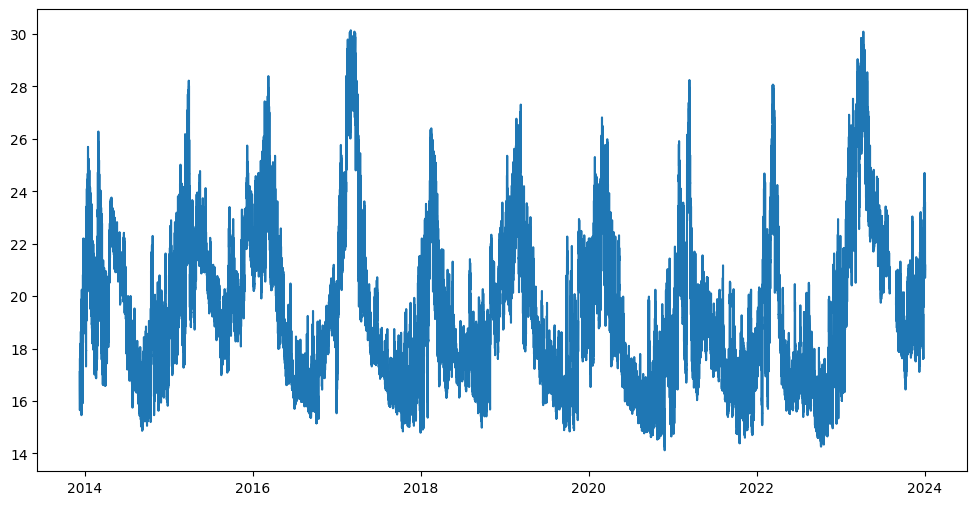

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df1['Date'], df1['T_agua'], label='T_agua')

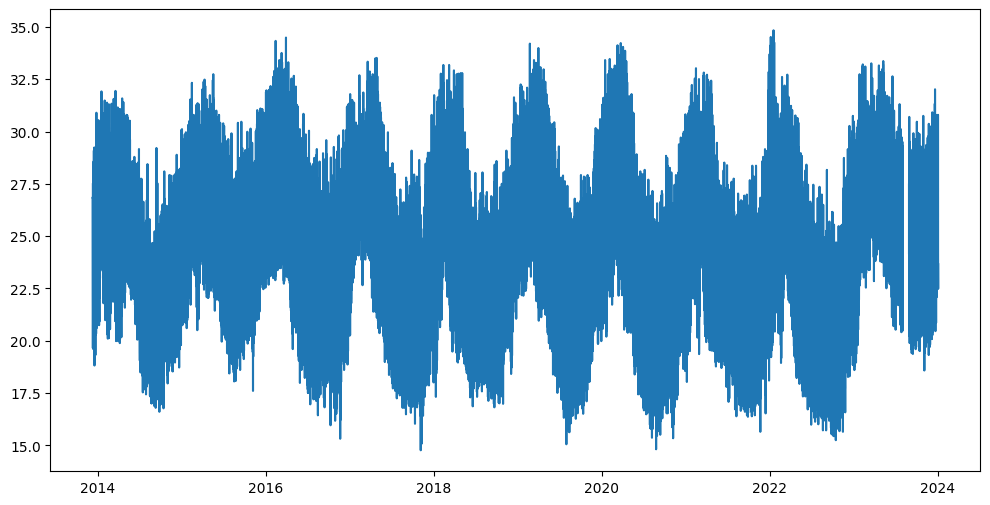

In [86]:
plt.figure(figsize=(12,6))
plt.plot(df1['Date'], df1['T_aire'], label='T_aire')

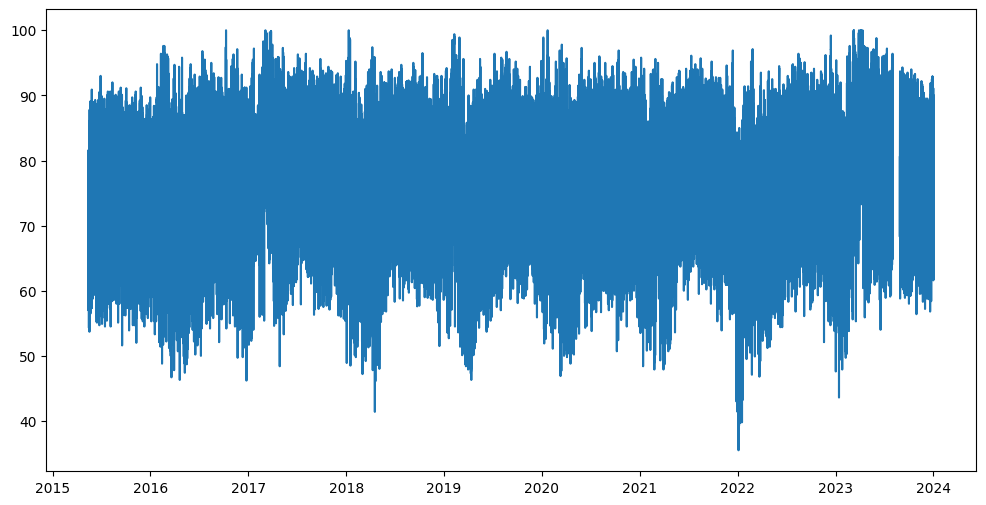

In [87]:
plt.figure(figsize=(12,6))
plt.plot(df2['Date'], df2['RH_aire'], label='RH_aire')

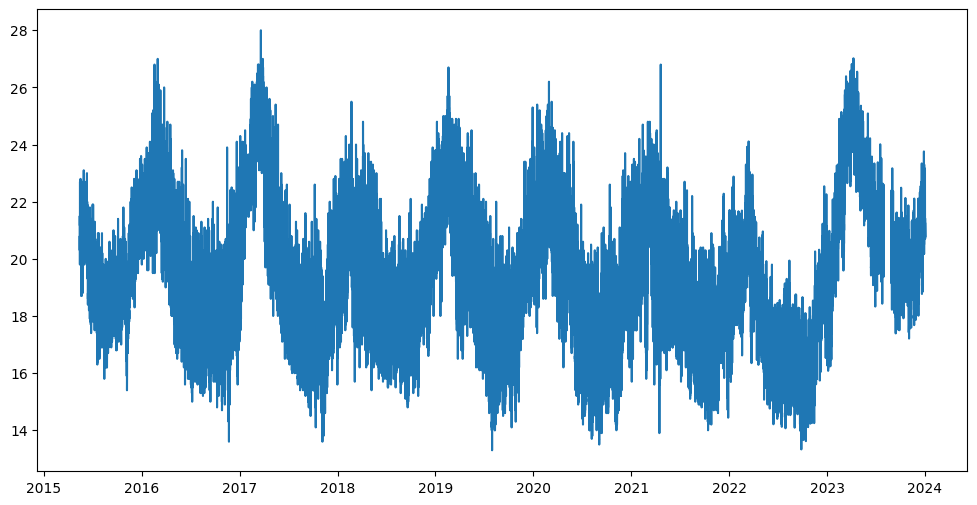

In [88]:
plt.figure(figsize=(12,6))
plt.plot(df2['Date'], df2['DP_aire'], label='DP_aire')

In [89]:
# Contar los NaN en cada columna y obtener las filas donde se encuentran NaN
nan_count1 = df1.isna().sum()
nan_rows1 = df1[df1.isnull().any(axis=1)]

nan_count2 = df2.isna().sum()
nan_rows2 = df2[df2.isnull().any(axis=1)]

# Imprimir la cantidad de NaN en cada columna y las filas donde se encuentran esos NaN
print("Cantidad de NaN en df1:\n", nan_count1)
print("\nFilas donde se encuentran NaN en df1:\n", nan_rows1)

print("\nCantidad de NaN en df2:\n", nan_count2)
print("\nFilas donde se encuentran NaN en df2:\n", nan_rows2)


Cantidad de NaN en df1:
 Date         0
T_agua    1337
T_aire    1335
dtype: int64

Filas donde se encuentran NaN en df1:
                       Date  T_agua  T_aire
803    2013-12-27 09:30:00     NaN     NaN
804    2013-12-27 10:00:00     NaN     NaN
805    2013-12-27 10:30:00     NaN     NaN
806    2013-12-27 11:00:00     NaN     NaN
807    2013-12-27 11:30:00     NaN     NaN
...                    ...     ...     ...
171822 2023-09-29 07:00:00     NaN     NaN
171823 2023-09-29 07:30:00     NaN     NaN
171824 2023-09-29 08:00:00     NaN     NaN
171825 2023-09-29 08:30:00     NaN     NaN
171826 2023-09-29 09:00:00     NaN     NaN

[1337 rows x 3 columns]

Cantidad de NaN en df2:
 Date          0
RH_aire    1322
DP_aire    1322
dtype: int64

Filas donde se encuentran NaN en df2:
                       Date  RH_aire  DP_aire
3743   2015-07-31 14:30:00      NaN      NaN
144040 2023-08-01 11:00:00      NaN      NaN
144041 2023-08-01 11:30:00      NaN      NaN
144042 2023-08-01 12:00:00   

In [90]:
df1.to_csv('df1.csv', index= False)
df2.to_csv('df2.csv', index= False)

In [186]:
#generamos una nueva data para 2023-24 donde se encuentra el hueco a rellenar
df=pd.read_csv('dataun14-23.csv')
df['Date'] = pd.to_datetime(df['Date'])
#Seleccionar solo las filas que van del 2023 al 2024
df_subset = df.loc[(df['Date'].dt.year >= 2023) & (df['Date'].dt.year <= 2024)]
df_subset.to_csv('data2023.csv', index=False)

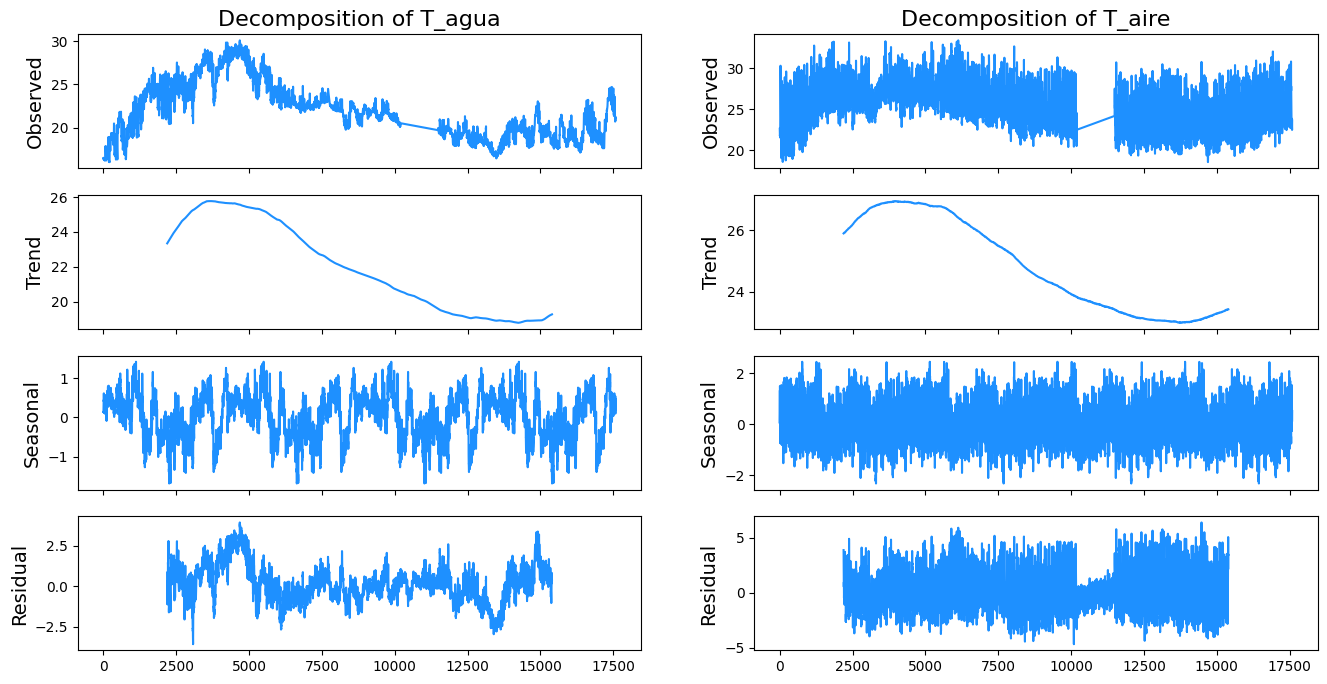

In [187]:
#cargamos la data 2023-24 para rellenar el hueco con el mismo metodo
df=pd.read_csv('data2023.csv')
dfi=df.interpolate()
core_columns1 =  ['T_agua', 'T_aire']
for column in core_columns1:
    decomp = seasonal_decompose(dfi[column], period=4380, model='additive')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal
    df[f"{column}_resid"] = decomp.resid
    
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['T_agua', 'T_aire']):
    
    res = seasonal_decompose(dfi[column], period=4380, model='additive')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

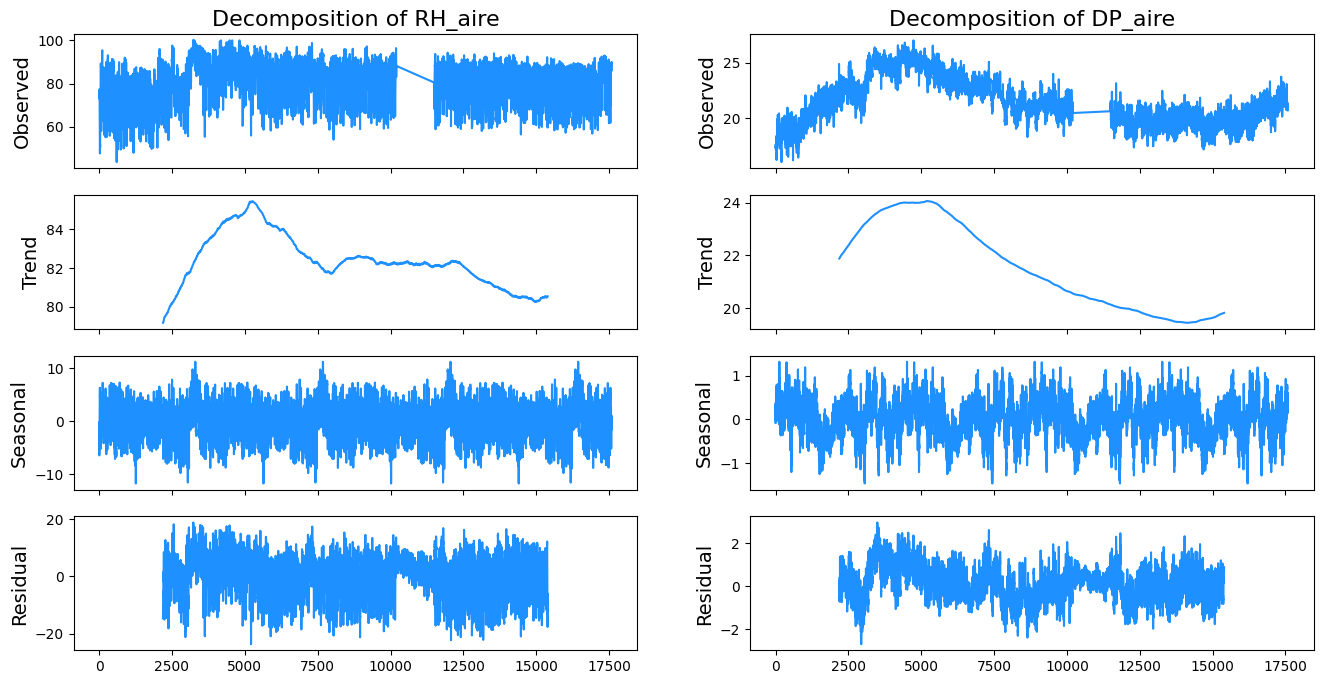

In [188]:
core_columns2 =  ['RH_aire', 'DP_aire']

for column in core_columns2:
    decomp = seasonal_decompose(dfi[column], period=4380, model='additive')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal
    df[f"{column}_resid"] = decomp.resid
    
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['RH_aire', 'DP_aire']):
    
    res = seasonal_decompose(dfi[column], period=4380, model='additive')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [189]:
df.head()

,Date,T_agua,T_aire,RH_aire,DP_aire,T_agua_trend,T_agua_seasonal,T_agua_resid,T_aire_trend,T_aire_seasonal,T_aire_resid,RH_aire_trend,RH_aire_seasonal,RH_aire_resid,DP_aire_trend,DP_aire_seasonal,DP_aire_resid
0,2023-01-01 00:00:00,16.42,22.63,73.2,17.61,NaN,0.138259,NaN,NaN,1.296699,NaN,NaN,-4.138159,NaN,NaN,0.358498,NaN
1,2023-01-01 00:30:00,16.39,22.54,73.5,17.58,NaN,0.145270,NaN,NaN,0.043945,NaN,NaN,-0.173121,NaN,NaN,0.052021,NaN
2,2023-01-01 01:00:00,16.42,22.37,74.1,17.55,NaN,0.135565,NaN,NaN,0.067729,NaN,NaN,-0.807737,NaN,NaN,-0.057839,NaN
3,2023-01-01 01:30:00,16.46,22.15,74.3,17.39,NaN,0.219163,NaN,NaN,0.544709,NaN,NaN,-2.442025,NaN,NaN,0.012239,NaN
4,2023-01-01 02:00:00,16.51,21.91,75.4,17.39,NaN,0.329414,NaN,NaN,0.434917,NaN,NaN,-2.142653,NaN,NaN,-0.087712,NaN


In [190]:
# Reemplazar valores nulos en RH_aire con la suma de RH_seasonal y RH_trend
df['T_agua'] = df.apply(lambda row: row['T_agua_seasonal'] + row['T_agua_trend'] if pd.isnull(row['T_agua']) else row['T_agua'], axis=1)

# Reemplazar valores nulos en DP_aire con la suma de DP_seasonal y DP_trend
df['T_aire'] = df.apply(lambda row: 2*row['T_aire_seasonal'] + row['T_aire_trend'] if pd.isnull(row['T_aire']) else row['T_aire'], axis=1)

# Reemplazar valores nulos en RH_aire con la suma de RH_seasonal y RH_trend
df['RH_aire'] = df.apply(lambda row: 2*row['RH_aire_seasonal'] + row['RH_aire_trend'] if pd.isnull(row['RH_aire']) else row['RH_aire'], axis=1)

# Reemplazar valores nulos en DP_aire con la suma de DP_seasonal y DP_trend
df['DP_aire'] = df.apply(lambda row: row['DP_aire_seasonal'] + row['DP_aire_trend'] if pd.isnull(row['DP_aire']) else row['DP_aire'], axis=1)

# Iterar sobre las filas de df2 para imprimir información cuando se reemplace un NaN
for index, row in df.iterrows():
    if pd.isnull(row['RH_aire']):
        print(f"Fila: {index}, Valor de trend_RH: {row['RH_aire_trend']}, Valor de seasonal_RH: {row['RH_aire_seasonal']}")

for index, row in df.iterrows():
    if pd.isnull(row['DP_aire']):
        print(f"Fila: {index}, Valor de trend_DP: {row['DP_aire_trend']}, Valor de seasonal_DP: {row['DP_aire_seasonal']}")

# Iterar sobre las filas de df1 para imprimir información cuando se reemplace un NaN
for index, row in df.iterrows():
    if pd.isnull(row['T_agua']):
        print(f"Fila: {index}, Valor de trend_Tw: {row['T_agua_trend']}, Valor de seasonal_Tw: {row['T_agua_seasonal']}")

for index, row in df.iterrows():
    if pd.isnull(row['T_aire']):
        print(f"Fila: {index}, Valor de trend_Ta: {row['T_aire_trend']}, Valor de seasonal_Ta: {row['T_aire_seasonal']}")

In [191]:
df=df.drop(['T_agua_trend','T_agua_seasonal','T_agua_resid','T_aire_trend','T_aire_seasonal','T_aire_resid','RH_aire_trend','RH_aire_seasonal','RH_aire_resid','DP_aire_trend','DP_aire_seasonal','DP_aire_resid'], axis=1)

In [192]:
# Contar los NaN en cada columna y obtener las filas donde se encuentran NaN
nan_count = df.isna().sum()
nan_rows = df[df1.isnull().any(axis=1)]

# Imprimir la cantidad de NaN en cada columna y las filas donde se encuentran esos NaN
print("Cantidad de NaN en df:\n", nan_count)
print("\nFilas donde se encuentran NaN en df:\n", nan_rows)

Cantidad de NaN en df:
 Date       0
T_agua     0
T_aire     0
RH_aire    0
DP_aire    0
dtype: int64

Filas donde se encuentran NaN en df:
                     Date  T_agua  T_aire  RH_aire  DP_aire
803  2023-01-17 17:30:00   18.22   25.82     62.1    18.03
804  2023-01-17 18:00:00   18.03   25.87     61.3    17.87
805  2023-01-17 18:30:00   18.10   26.13     59.6    17.68
806  2023-01-17 19:00:00   18.08   26.26     58.7    17.55
807  2023-01-17 19:30:00   17.96   25.50     63.5    18.09
808  2023-01-17 20:00:00   17.89   24.97     65.4    18.05
809  2023-01-17 20:30:00   17.84   24.36     68.8    18.29
810  2023-01-17 21:00:00   17.87   24.56     68.5    18.40
811  2023-01-17 21:30:00   17.82   24.10     70.1    18.33
812  2023-01-17 22:00:00   17.84   24.03     69.9    18.22
813  2023-01-17 22:30:00   17.91   23.74     70.1    17.98
814  2023-01-17 23:00:00   18.03   23.04     74.9    18.37
815  2023-01-17 23:30:00   18.08   23.26     74.3    18.45
816  2023-01-18 00:00:00   18.08 

C:\Users\carlo\AppData\Local\Temp\ipykernel_14328\2327109546.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nan_rows = df[df1.isnull().any(axis=1)]


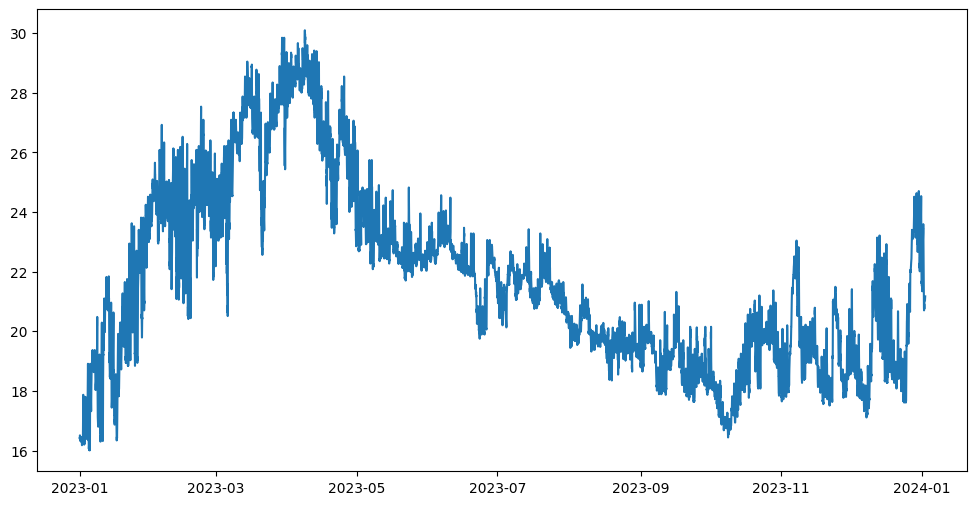

In [193]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['T_agua'], label='T_agua')

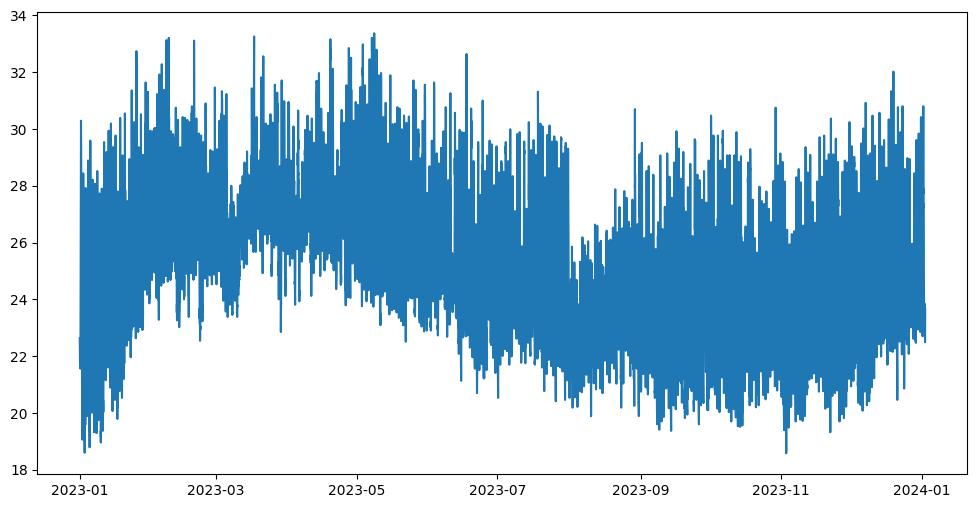

In [194]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['T_aire'], label='T_aire')

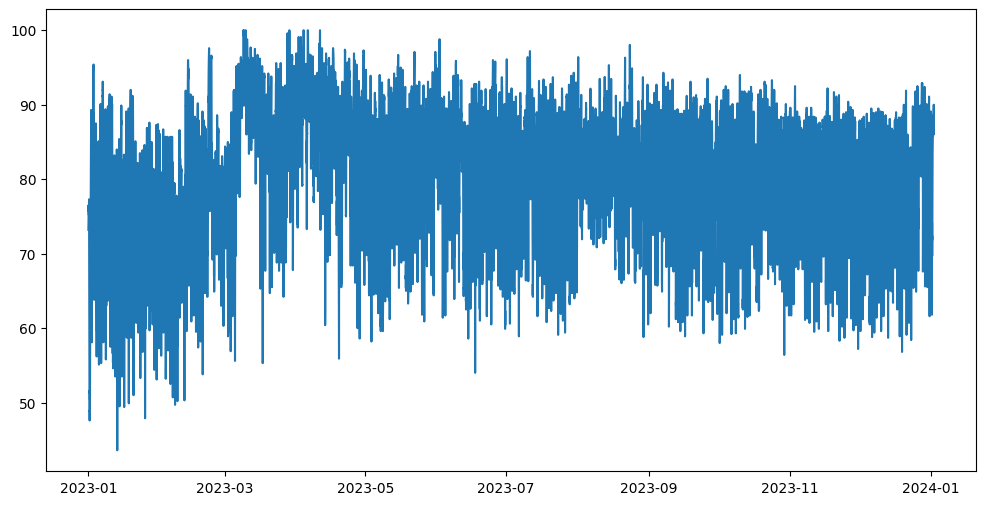

In [195]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['RH_aire'], label='RH_aire')

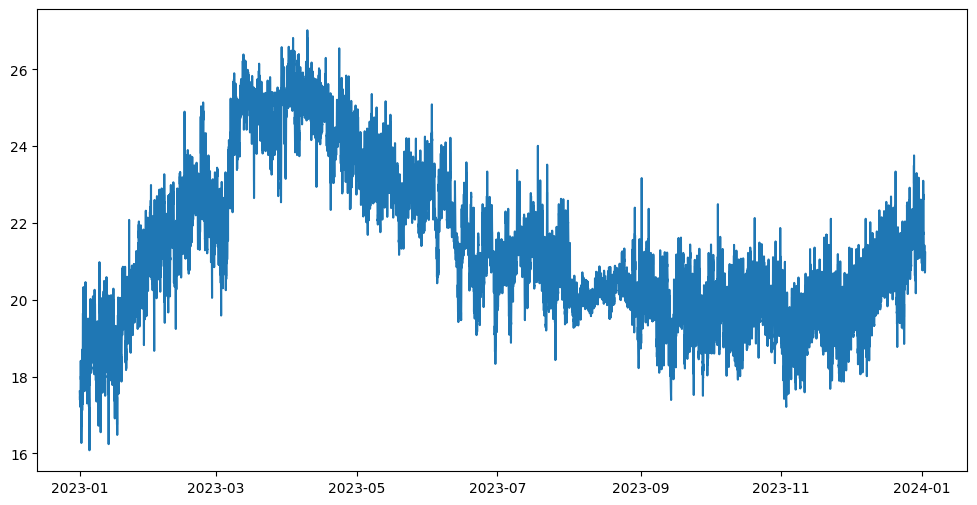

In [196]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['DP_aire'], label='DP_aire')

In [229]:
df.to_csv('data2023.csv', index=False)

In [230]:
#cargamosclos 3 datos interpolados
df1_1=pd.read_csv('df1.csv')
df1_2=pd.read_csv('df2.csv')
df2=pd.read_csv('data2023.csv')

# Unimos df1_1 y df1_2
df1 = pd.merge(df1_1, df1_2, on='Date', how='outer')

# Convertimos las fechas a formato datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Concatenamos df1 y df2
merged_df = pd.concat([df2, df1], ignore_index=True)

# Eliminar filas duplicadas basadas en la columna 'Date'
merged_df = merged_df.drop_duplicates(subset=['Date'])

# Ordenar el DataFrame por la columna 'Date'
merged_df = merged_df.sort_values(by='Date')

#interpolamos los valores faltantes (14 y son del 2013 (T_agua y T_aire))
merged_df['T_agua']=merged_df['T_agua'].interpolate()
merged_df['T_aire']=merged_df['T_aire'].interpolate()

merged_df.to_csv('dataun14-23i.csv', index=False)

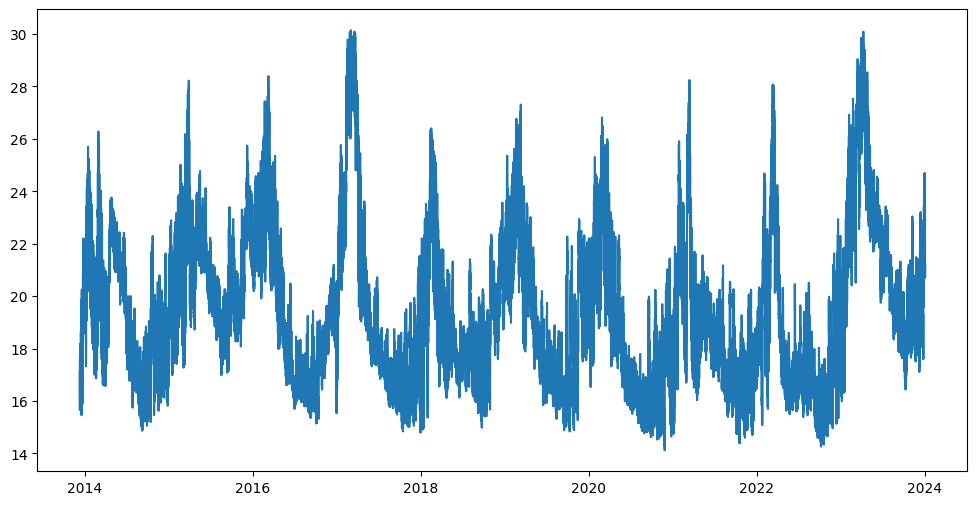

In [231]:
df=pd.read_csv('dataun14-23i.csv')
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['T_agua'], label='T_agua')

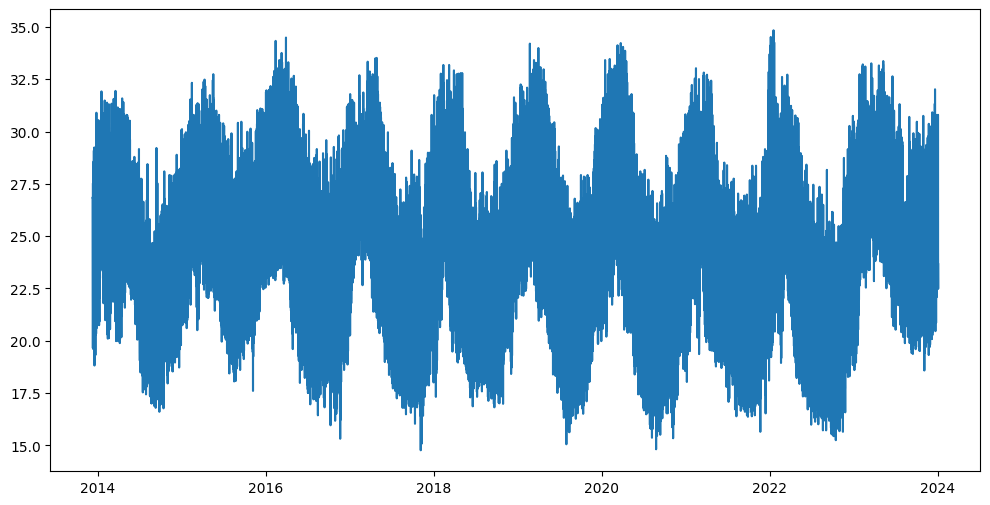

In [232]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['T_aire'], label='T_aire')

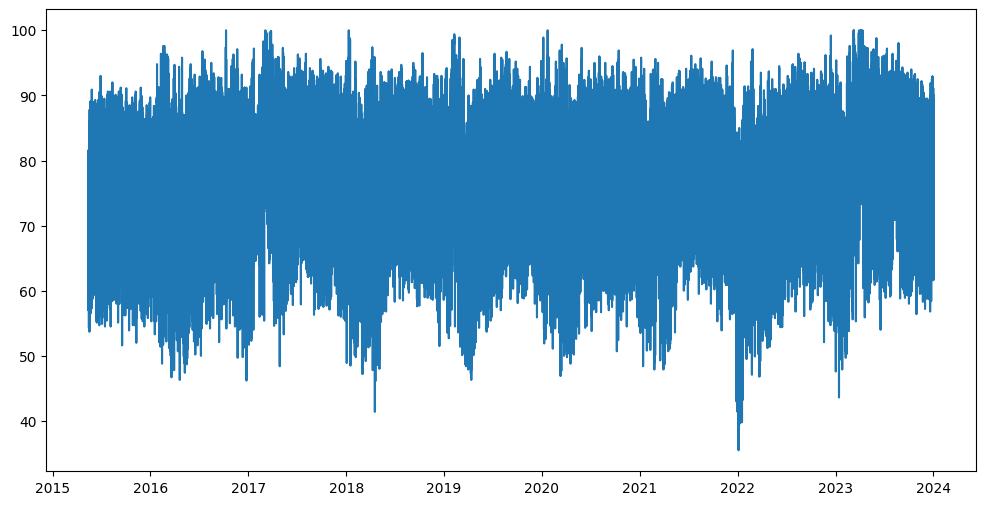

In [233]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['RH_aire'], label='RH_aire')

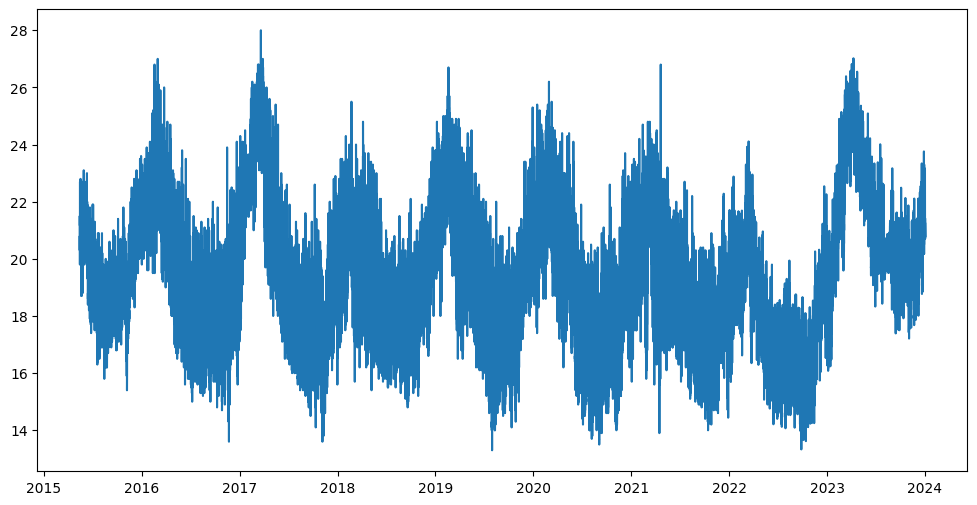

In [234]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['DP_aire'], label='DP_aire')

In [235]:
# Contar los NaN en cada columna
nan_count = df.isna().sum()

# Imprimir la cantidad de NaN en cada columna
print("Cantidad de NaN df2:\n", nan_count)

Cantidad de NaN df2:
 Date           0
T_agua         0
T_aire         0
RH_aire    24959
DP_aire    24959
dtype: int64
